<a href="https://colab.research.google.com/github/laryskasagan/Machine_Learning/blob/main/IrisDecisionForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_decision_forests

import tensorflow_decision_forests as tfdf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 43.6 MB/s eta 0:00:00


In [3]:
data = sns.load_dataset('iris')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Checking if any value is missing.

In [5]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There are no missing value in any of columns in Iris DataFrame - it is clean dataset.

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Features with a larger standard deviation (petal length) have more variation in the data compared to those with smaller stad

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


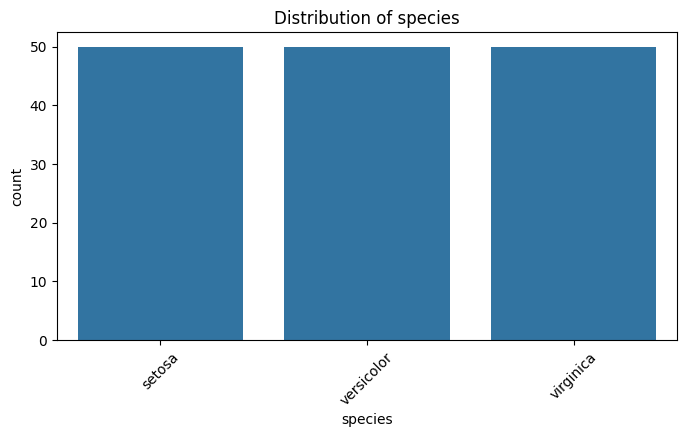

In [6]:
categorical_cols = data.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(data=data, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


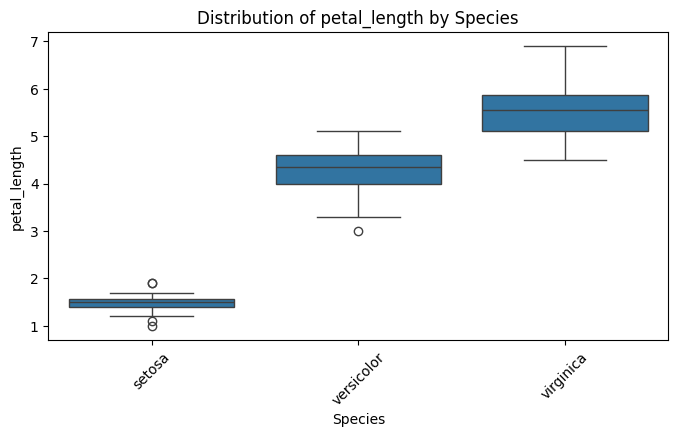

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


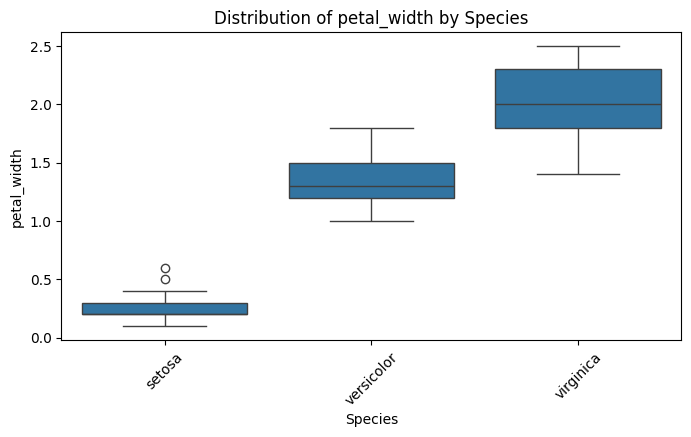

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


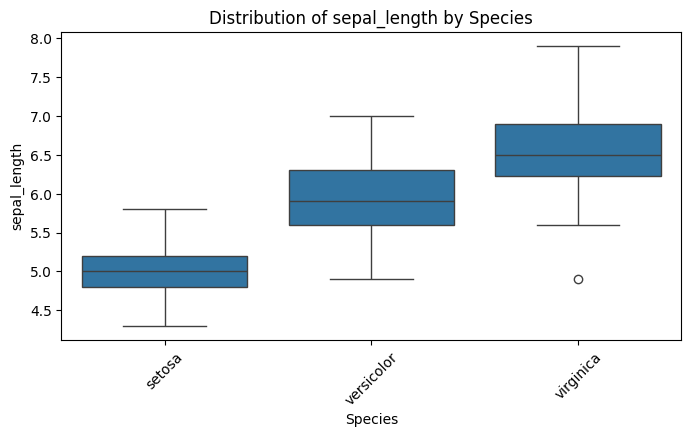

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


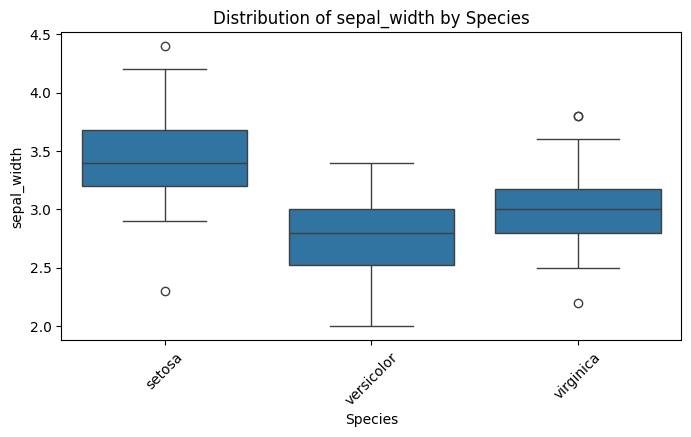

In [7]:
numeric_features = data.select_dtypes(include=['float64','int64']).columns.difference(['species'])

for feature in numeric_features:
  plt.figure(figsize=(8,4))
  sns.boxplot(data=data, x='species', y=feature)
  plt.title(f'Distribution of {feature} by Species')
  plt.xlabel('Species')
  plt.ylabel(feature)
  plt.xticks(rotation=45)
  plt.show()

In [11]:
species_encoder = LabelEncoder()

data['species'] = species_encoder.fit_transform(data['species'])

species_mapping = dict(zip(species_encoder.classes_, species_encoder.transform(species_encoder.classes_)))

The mapping dictionary allows to interpret the numeric labels by mapping them back to their original names. It allows to translate model's predictions back to original names after classification.

In [16]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='species')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='species')

model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose=2)

model.evaluate(test_ds, return_dict=True)
model.summary()

Use /tmp/tmp0da_fzcr as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'sepal_length': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'sepal_width': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'petal_length': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'petal_width': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'sepal_length': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'sepal_width': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'petal_length': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'petal_width': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>)}
Training dataset rea

2024-10-08 16:48:06.917578: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1234] Loading model from path /tmp/tmp0da_fzcr/model/ with prefix 12b0ae2f72cb4012
I0000 00:00:1728406086.980196     222 decision_forest.cc:761] Model loaded with 300 root(s), 2946 node(s), and 4 input feature(s).
I0000 00:00:1728406086.980821     222 abstract_model.cc:1323] Engine "RandomForestGeneric" built
2024-10-08 16:48:06.980963: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model trained in 0:00:00.302107
Compiling model...
Model compiled.
1/1 [==============================] - 0s 234ms/step - loss: 0.0000e+00
Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	petal_length
	petal_width
	sepal_length
	sepal_width

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "petal_length"  0.573308 ################
    2.  "petal_width"  0.538784 ##############
    3. "sepal_length"  0.275232 
    4.  "sepal_width"  0.271149 

Variable Importance: NUM_AS_ROOT:
    1. "petal_length" 156.000000 ################
    2.  "petal_width" 144.000000 

Variable Importance: NUM_NODES:
    1. "petal_length" 597.000000 

Conclusion:
1.   Var importance:

INV_MEAN_MIN_DEPTH - how deep a feature is used across tree?

The lower the score, the more important the feature - this means that the feature is used earlier in the decision-making process!
**It suggest that the model relies on that feature to make predictions**

*petal_length* is most important
2.   Model Evaluation:

Winner Takes All - this indicates that the Random Forest model takes the most voted class as the prediction.

Number of trees in Forrest ---> 300

The RF model achives a high accuracy - approx. ~94.17%
The low logloss value suggests that the model's probability predictions are reliable.

In [20]:
inspector = model.make_inspector()

importance_types = inspector.variable_importances().keys()

test_predictions = model.predict(test_ds)
predicted_labels = np.argmax(test_predictions, axis=1)

test_labels = test_data['species'].values

accuracy= accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('\nConfusion Matrix:')
print(conf_matrix)

1/1 [==============================] - 0s 67ms/step
Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
